In [2]:
import sys
sys.path.append('lib')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pre_process import pre_process

In [3]:
pre_process = pre_process()

In [4]:
pre_process.kor_daily_data

,confirmed,death,released,negative,tested,critical,stringency_index
date,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-20,630.0,4.0,422.0,13689.0,18714.0,151.0,50.0
2021-05-21,551.0,6.0,497.0,33918.0,39750.0,147.0,50.0
2021-05-22,645.0,4.0,874.0,29778.0,33858.0,150.0,50.0


In [3]:
pre_process.save()

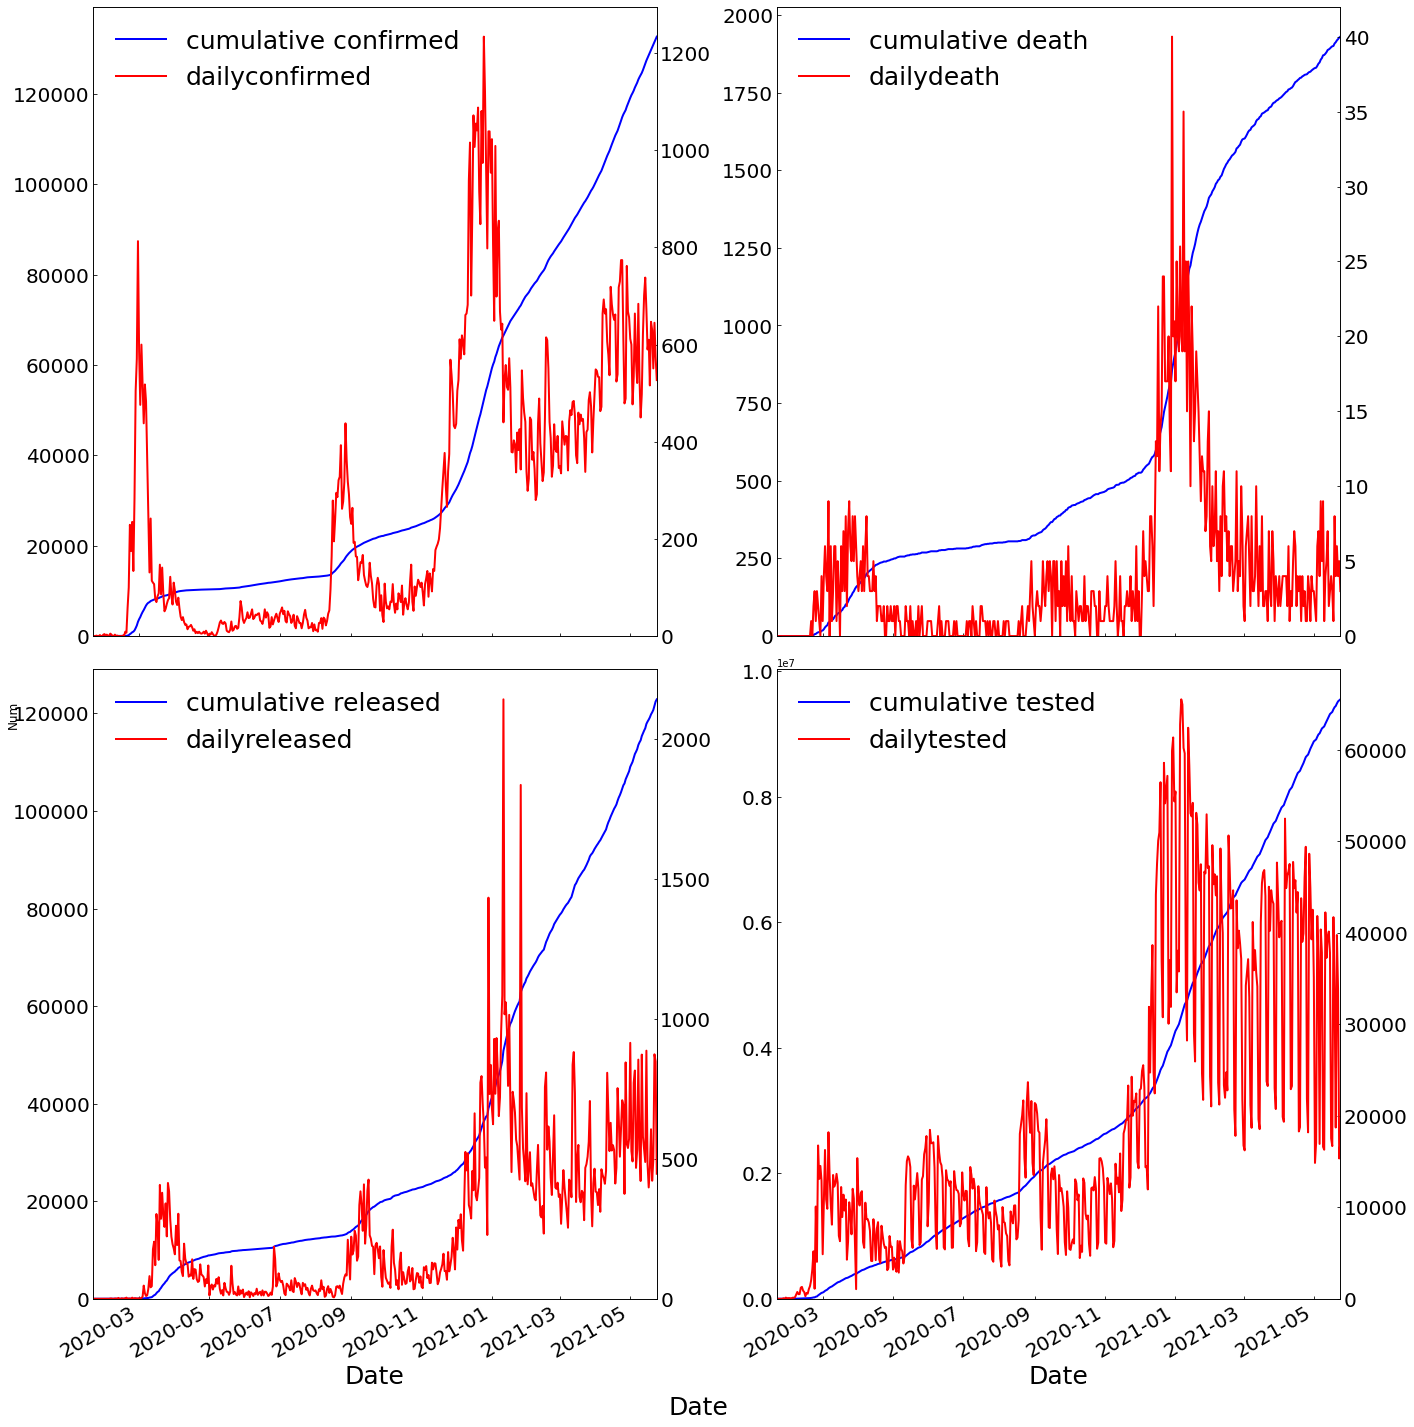

In [3]:
pre_process.plot(col_list=['confirmed', 'death', 'released', 'tested'])